<h1 style="text-align: center;">Teknik İndikatörlerle Desteklenmiş LSTM Modeli ile Finansal Fiyat Tahmini Projesi</h1>

# Projenin amacı : 

<p>Bu proje, finansal zaman serileri analizi ve gelecekteki kapanış fiyatlarının tahmini için <strong>LSTM (Uzun Kısa Süreli Bellek) </strong>tabanlı bir derin öğrenme modeli geliştirmeyi amaçlamaktadır. Ayrıca, bu modelin performansını doğrulamak için</p>
<ul>
  <li><strong>RSI (Göreceli Güç Endeksi)</strong></li>
  <li><strong>Ichimoku Indikatörü</strong></li>
  <li><strong>Bollinger Bantları</strong></li>
</ul>
<p>gibi çeşitli teknik indikatörlerin kullanılması üzerine odaklanmaktadır. Proje, finansal piyasalardaki fiyat hareketlerini tahmin etme yeteneğini artırmak için derin öğrenme ve teknik analiz yöntemlerinin birleştirilmesini amaçlamaktadır.</p>


# Projenin Adımları : 

<ol>
    <li>Veri setinin yfinance kütüphanesi kullanılarak eklenmesi.</li>
    <li>Eksik veri kontrolü</li>
    <li>Verilerin ölçeklendirilerek LSTM modeli için uygun hale getirilmesi</li>
    <li>Veri setinin modele uygun şekilde ayrılması </li>
    <li>Çok katmanlı LSTM modeli oluşturma </li>
    <li>Modelin eğitimi ve geçerlilik izlemesinin yapılması</li>
    <li>Model performansının değerlendirilmesi</li>
    <li>Gerçek ve tahmin edilen fiyatların görselleştirilmesi</li>
    <li>Gelecekteki fiyatların tahmininin yapılması</li>
    <li>Modelin yaptığı fiyat düşüşü tahminini anlamlı hale getirmek için Teknik indikatörlerin kullanılması
        <ul>
            <li>RSI (Göreceli Güç Endeksi)</li>
            <li>Bollinger Bantları</li>
            <li>Ichimoku İndikatörü</li>
        </ul>
    </li>
    <li>RSI (Göreceli Güç Endeksi) ile modelin yaptığı fiyat düşüşü hareketinin nedeninin açıklanması</li>
    <li>Bollinger Bantları ile modelin yaptığı fiyat düşüşü hareketinin nedeninin açıklanması</li>
    <li>Ichimoku İndikatörü ile modelin yaptığı fiyat düşüşü hareketinin nedeninin açıklanması</li>
    <li>Model tahminlerinin gerçek verilerle karşılaştırılması</li>
</ol>


<h5>Geliştiren  : Hüseyin Erol</h5>

Kişisel websitem : https://huseyineroll.com/

Github : https://github.com/HuseyinErol24

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
tf.disable_v2_behavior()
from keras.callbacks import EarlyStopping

# Veri setinin eklenmesi

In [40]:
veri_seti = yf.download("AAPL",start="2015-01-01",end="2023-11-22")

[*********************100%%**********************]  1 of 1 completed


In [41]:
veri_seti.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435265,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746889,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749119,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082144,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000


In [42]:
veri_seti.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-15,187.850006,189.500000,187.779999,188.009995,187.770386,53790500
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.468246,54412900
2023-11-17,190.250000,190.380005,188.570007,189.690002,189.448257,50922700
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.206009,46505100
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.397049,38134500


.

.

# Eksik veri Kontrolü

In [43]:
#Eksik veri kontrolü
if(veri_seti.isnull().sum().sum() == 0):
    print("Eksik veri yok")
else:
    print("eksik veri mevcut")

Eksik veri yok


In [44]:
kapanis_verileri = veri_seti["Close"].values

In [45]:
kapanis_verileri = kapanis_verileri.reshape(-1,1)

In [46]:
kapanis_verileri

array([[ 27.33250046],
       [ 26.5625    ],
       [ 26.56500053],
       ...,
       [189.69000244],
       [191.44999695],
       [190.63999939]])

In [47]:
print("kapanış verisis sayısı = ",len(kapanis_verileri))

kapanış verisis sayısı =  2238


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


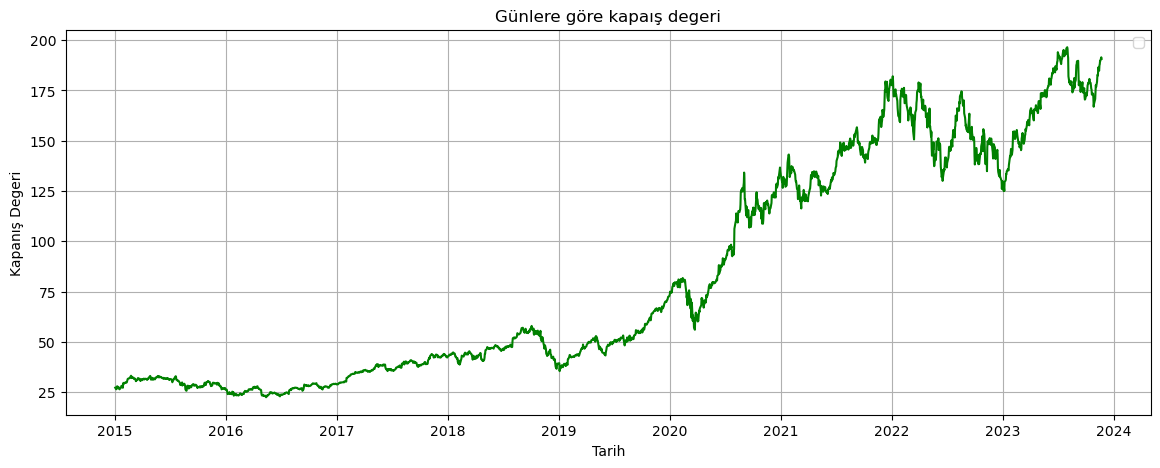

In [48]:
plt.figure(figsize=(14,5))
plt.plot(veri_seti["Close"],"green")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Degeri")
plt.title("Günlere göre kapaış degeri")
plt.legend()
plt.grid()

# Verilerin 0-1 arasına Yerleştirilmesi

In [49]:
scaler = MinMaxScaler()

In [50]:
scaler.fit(kapanis_verileri)

MinMaxScaler()

In [51]:
kapanis_verileri_sc = scaler.transform(kapanis_verileri)

In [52]:
kapanis_verileri_sc #kapanış degerlerinin 0-1 arasına yerleştirilmiş hali

array([[0.02730568],
       [0.02287695],
       [0.02289133],
       ...,
       [0.96111929],
       [0.97124206],
       [0.96658328]])

In [53]:
print("Kapanış verileri 0-1 arasına yeleştirdik elaman sayısı değişmezi yani : ",len(kapanis_verileri_sc))

Kapanış verileri 0-1 arasına yeleştirdik elaman sayısı değişmezi yani :  2238


<p>Veri setini, 90 giriş ve 1 çıkış verisi olarak düzenlemek için 'veri_seti_hazırlama' fonksiyonunu kullanacağım.</p>

# Veri setini, 90 giriş ve 1 çıkış verisi olarak düzenlenmesi

In [54]:
def veri_seti_hazirlama(veri_kumesi, adim):
    X, y = [], []
    for i in range(len(veri_kumesi)):
        sonraki_elaman = i + adim
        if sonraki_elaman > len(veri_kumesi) - 1:
            break
        else:
            x_degerleri = veri_kumesi[i:sonraki_elaman]
            y_degeri = veri_kumesi[sonraki_elaman]
            X.append(x_degerleri)
            y.append(y_degeri)
    return np.array(X), np.array(y)

In [55]:
adim_sayisi = 90 #90 elamanı girdi verisi olarak kullanacagız ve 1 cıktı olacak
X_degerleri, y_degeri = veri_seti_hazirlama(kapanis_verileri_sc, adim_sayisi)

In [56]:
print(len(X_degerleri[0]))#burda 90 elaman var 

90


In [57]:
X_degerleri[0,0:30] 
#burda 90 elamanın hepsini yazdırmak yerine 30 tanesini gösterecegim (cok yer kaplamaması için yaptım bunu)

array([[0.02730568],
       [0.02287695],
       [0.02289133],
       [0.0250338 ],
       [0.03098669],
       [0.03115924],
       [0.02719064],
       [0.0285854 ],
       [0.02798149],
       [0.02369655],
       [0.02250309],
       [0.02642856],
       [0.02762202],
       [0.03172002],
       [0.032554  ],
       [0.03272654],
       [0.02703247],
       [0.0359043 ],
       [0.04106635],
       [0.03856441],
       [0.04067811],
       [0.04070688],
       [0.04201536],
       [0.04256177],
       [0.04110949],
       [0.04224543],
       [0.04555258],
       [0.04966497],
       [0.05193685],
       [0.05282835]])

<p><strong>burdaki 90 degerin çıktısı 91. deger yani y[0] yani array([0.0512898]) buna eşit olacak şekilde modeli egitip gelecekteki verileri tahmin etmeye çalışacagız</strong></p>

In [58]:
y_degeri[0] 

array([0.0512898])

In [59]:
# Eğitim ve test setlerinin oluşturulması
egitim_boyutu = int(len(X_degerleri) * 0.80)
#bu şekilde egitim boyutunu belirleyecegiz
X_train, X_test = X_degerleri[:egitim_boyutu], X_degerleri[egitim_boyutu:]
y_train, y_test = y_degeri[:egitim_boyutu], y_degeri[egitim_boyutu:]

In [60]:
X_train.shape

(1718, 90, 1)

In [61]:
y_train.shape

(1718, 1)

# Çok Katmanlı LSTM Modeli Oluşturma

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(90,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.summary() #modelin özeti

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 90, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 90, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Eğitimi ve Geçerlilik İzlemesiyle Eğitim Süreci

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])



Train on 1718 samples, validate on 430 samples
Epoch 1/100
1718/1718 [==============================] - ETA: 0s - loss: 0.0085

C:\Users\Hüseyin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1718/1718 [==============================] - 4s 3ms/sample - loss: 0.0085 - val_loss: 0.0029
Epoch 2/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 6.1782e-04 - val_loss: 0.0032
Epoch 3/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 5.8037e-04 - val_loss: 0.0023
Epoch 4/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 5.5035e-04 - val_loss: 0.0021
Epoch 5/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 5.1183e-04 - val_loss: 0.0020
Epoch 6/100
1718/1718 [==============================] - 4s 2ms/sample - loss: 6.2130e-04 - val_loss: 0.0027
Epoch 7/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 4.7553e-04 - val_loss: 0.0017
Epoch 8/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 5.6087e-04 - val_loss: 0.0025
Epoch 9/100
1718/1718 [==============================] - 4s 2ms/sample - loss: 4.7978e-04 - val_loss: 0.0014
Epoch 10/100
1718/1718 [===========

Epoch 74/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 1.1912e-04 - val_loss: 3.3247e-04
Epoch 75/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 8.9994e-05 - val_loss: 5.5824e-04
Epoch 76/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 1.1485e-04 - val_loss: 3.5149e-04
Epoch 77/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 1.2700e-04 - val_loss: 3.1242e-04
Epoch 78/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 9.8936e-05 - val_loss: 4.1004e-04
Epoch 79/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 1.0039e-04 - val_loss: 9.9950e-04
Epoch 80/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 1.5595e-04 - val_loss: 5.1925e-04
Epoch 81/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 1.0013e-04 - val_loss: 2.9761e-04
Epoch 82/100
1718/1718 [==============================] - 3s 2ms/sample - loss: 9.2567e-

# Model Performansının Değerlendirilmesi

In [66]:
def tahmin_ve_skor(model, X, y):
    tahminler = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, tahminler))
    return rmse, tahminler

rmse_train, train_predict = tahmin_ve_skor(model, X_train, y_train)
rmse_test, test_predict = tahmin_ve_skor(model, X_test, y_test)

print("Eğitim verisi skoru (RMSE):", rmse_train)
print("Test verisi skoru (RMSE):", rmse_test)

C:\Users\Hüseyin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Eğitim verisi skoru (RMSE): 0.008793476897156188
Test verisi skoru (RMSE): 0.017410972937080528


<h4>Eğitim verisi skoru: 0.008793476897156188</h4>
<h4>Test verisi skoru      : 0.017410972937080528</h4>

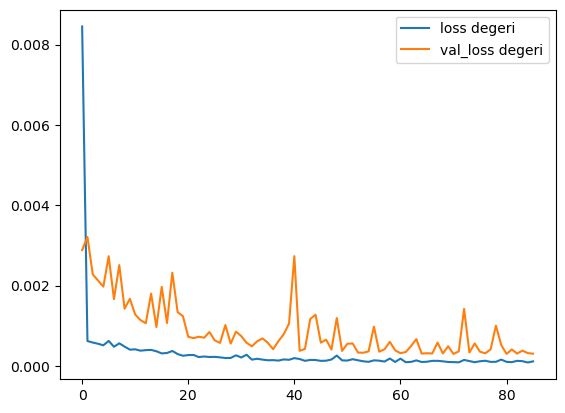

In [67]:
plt.plot(range(len(model.history.history["loss"])), model.history.history["loss"], label="loss degeri")
plt.plot(range(len(model.history.history["val_loss"])), model.history.history["val_loss"], label="val_loss degeri")
plt.legend()
plt.show()

# Gercek ve Tahmin Edilen Kapanis Fiyatlari

In [68]:
gercek_x_degerleri, _ = veri_seti_hazirlama(kapanis_verileri_sc, 90)
tahminler = model.predict(gercek_x_degerleri)
tahminler = scaler.inverse_transform(tahminler)

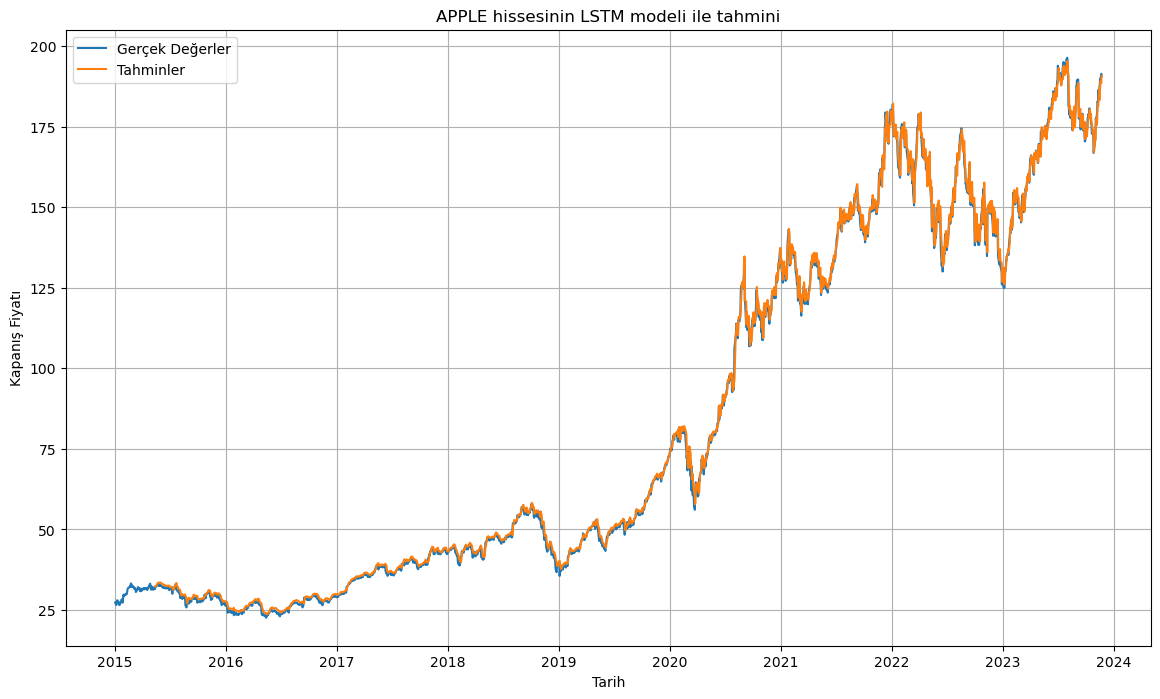

In [71]:
# scaler.inverse_transform(kapanis_verileri_sc) burda değerleri 0-1 arasıdnan çıkarıp gerçek ölçegine geri getiriyorum
plt.figure(figsize=(14, 8))
plt.plot(veri_seti.index, scaler.inverse_transform(kapanis_verileri_sc), label='Gerçek Değerler')
plt.plot(veri_seti.index[adim_sayisi:], tahminler, label='Tahminler')
plt.title("APPLE hissesinin LSTM modeli ile tahmini")
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.grid(True)
plt.show()

# Gerçek ve Tahmin Edilen Kapanış Fiyatlarının LSTM Modeliyle Detaylı Karşılaştırılması

In [72]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
#X_train ve X_test verilerini model ile test ediyorum bu sayede daha mode konusunda daha net bir fikir elde edebilirirm

In [73]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
#burda verileri 0-1 arasından cıkarıp gerçek ölçülerine geri getirdim

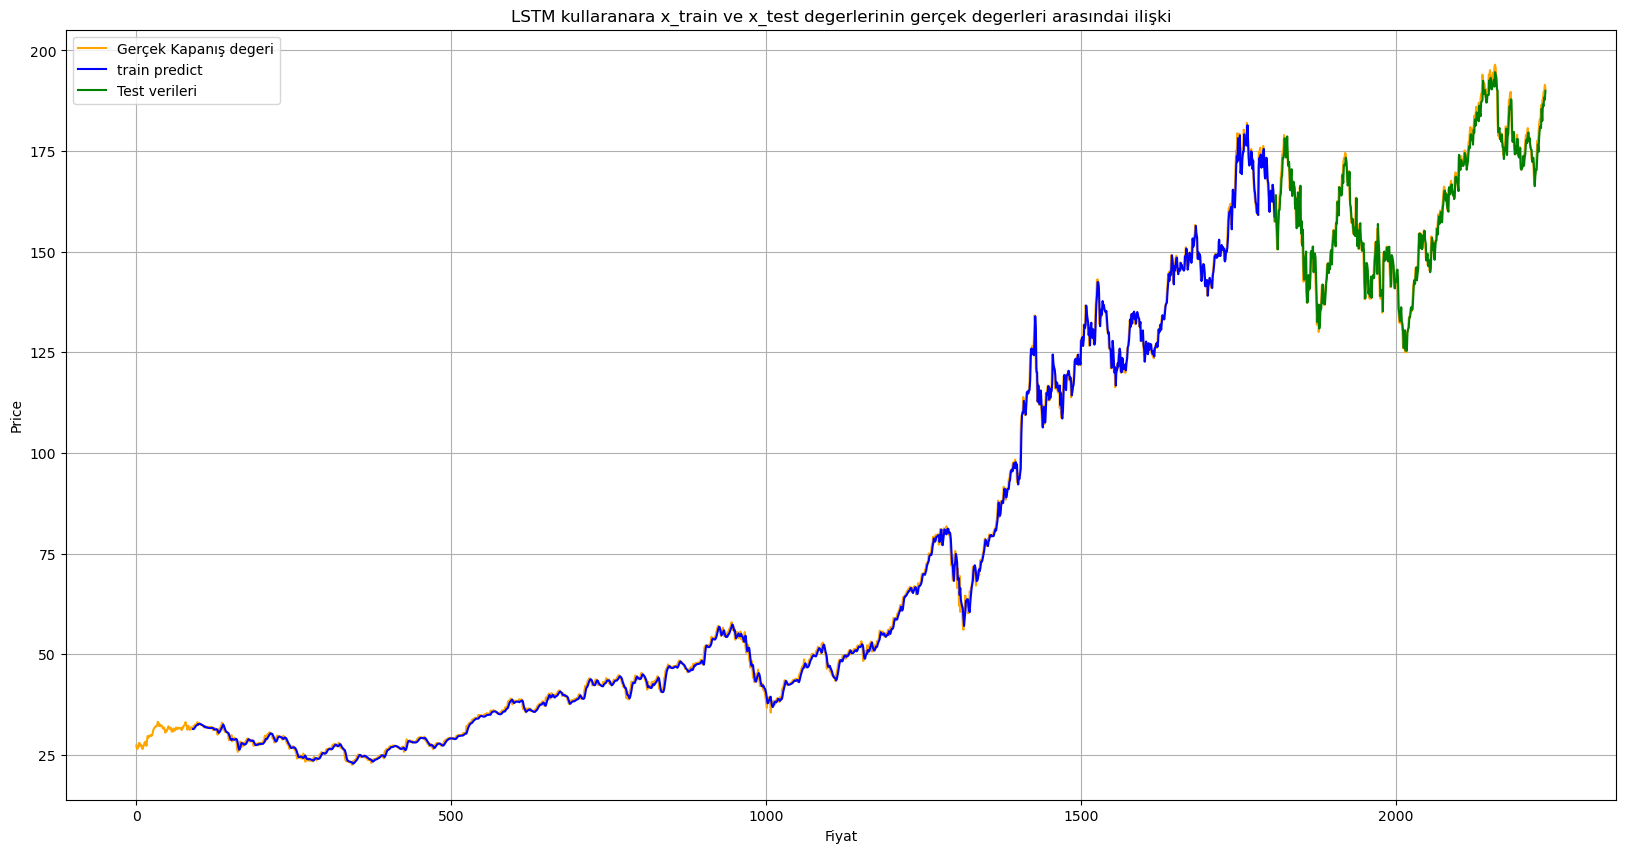

In [74]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = train_predict.reshape(-1, 1) if len(train_predict.shape) == 1 else train_predict
test_predict = test_predict.reshape(-1, 1) if len(test_predict.shape) == 1 else test_predict
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
steps = 90
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(kapanis_verileri_sc), label="Gerçek Kapanış degeri", color="orange")
plt.plot(range(steps, len(train_predict) + steps), train_predict, label="train predict", color="blue")
plt.plot(range(steps + len(train_predict), steps + len(train_predict) + len(test_predict)), test_predict, label="Test verileri", color="green")
plt.title("LSTM kullaranara x_train ve x_test degerlerinin gerçek degerleri arasındai ilişki")
plt.xlabel("Fiyat")
plt.ylabel("Price")
plt.legend()
plt.grid()


<h1 style="color:red">Gelecekteki Kapanış Fiyatlarının LSTM Modeli ile Tahmini</h1>


[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Kapanış Fiyatı')

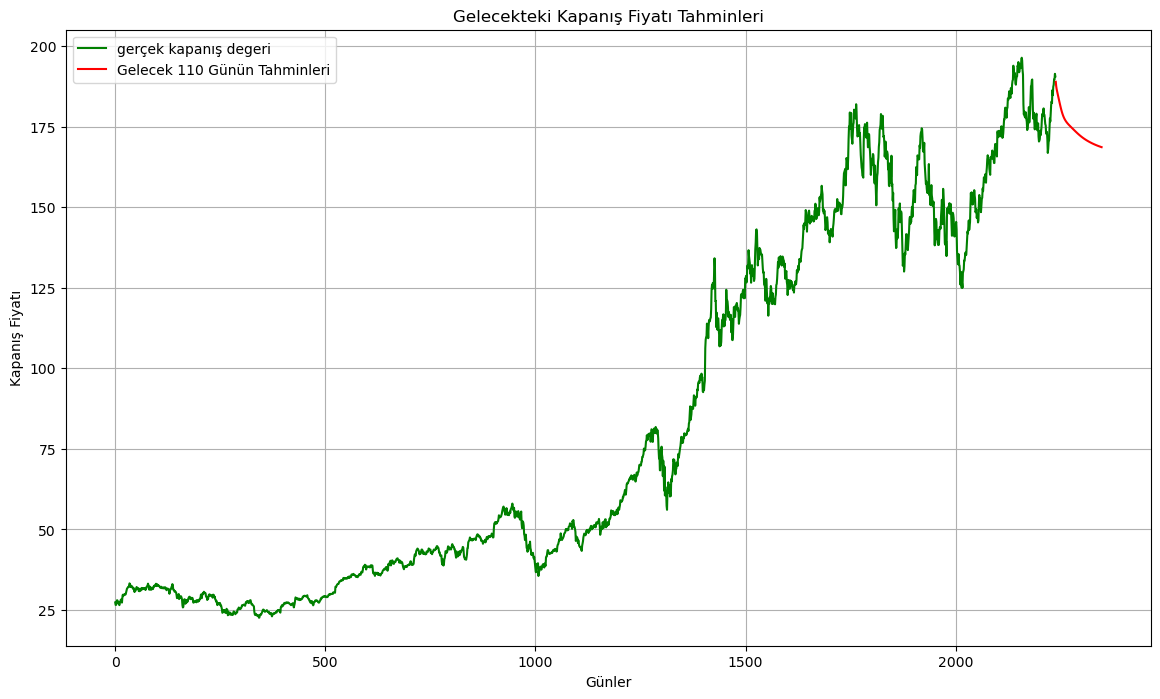

In [307]:

last_90_days = kapanis_verileri_sc[-90:].reshape(1, 90, 1)
veri_seti = yf.download("AAPL",start="2015-01-01",end="2023-11-22")
future_predictions_scaled = []


for _ in range(110):#110 gün için tahmin yapıyorum o nedenele range(110)
    next_day_price = model.predict(last_90_days)
    future_predictions_scaled.append(next_day_price[0, 0])
    next_day_price_reshaped = np.array([[next_day_price[0, 0]]]).reshape(1, 1, 1)
    last_90_days = np.append(last_90_days[:, 1:, :], next_day_price_reshaped, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(range(len(veri_seti["Close"])),veri_seti["Close"],label="gerçek kapanış degeri",color="green")
plt.plot(range(len(kapanis_verileri), len(kapanis_verileri) + 110), future_predictions,color="red", label="Gelecek 110 Günün Tahminleri")
plt.legend()
plt.grid()
plt.title("Gelecekteki Kapanış Fiyatı Tahminleri")
plt.xlabel("Günler")
plt.ylabel("Kapanış Fiyatı")

<h3 style="color:red">Modelin 110 günlük Tahmini bu şekilde</h3>

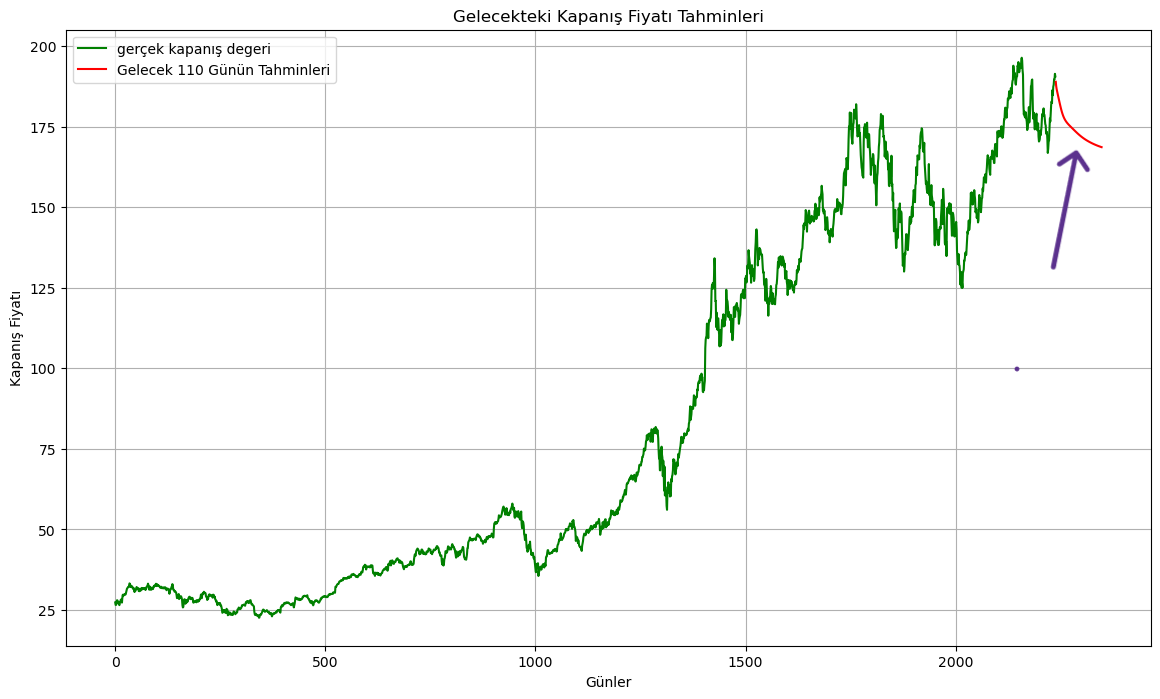

# Model Sonuçunu Test Etmek İçin Teknik İndikatörlerin Kullanımı


<h2><span style="color:red;">Bu aşamada, modelin yükselen bir hisse senedinde neden beklenenden daha düşük bir fiyat performansı sergilediğini anlamak için teknik indikatörleri kullanacağız.</span></h2>

In [5]:
veri_seti = yf.download("AAPL",start="2015-01-01",end="2023-11-22")

[*********************100%%**********************]  1 of 1 completed


<h2>Modelin Fiyat Düşüşü Tahminini RSI İndikatörü ile Doğrulamak</h2>

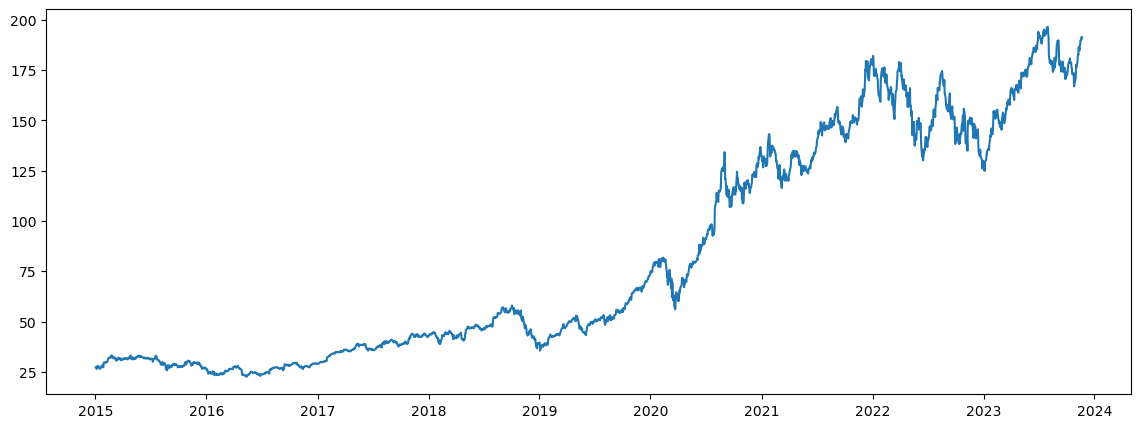

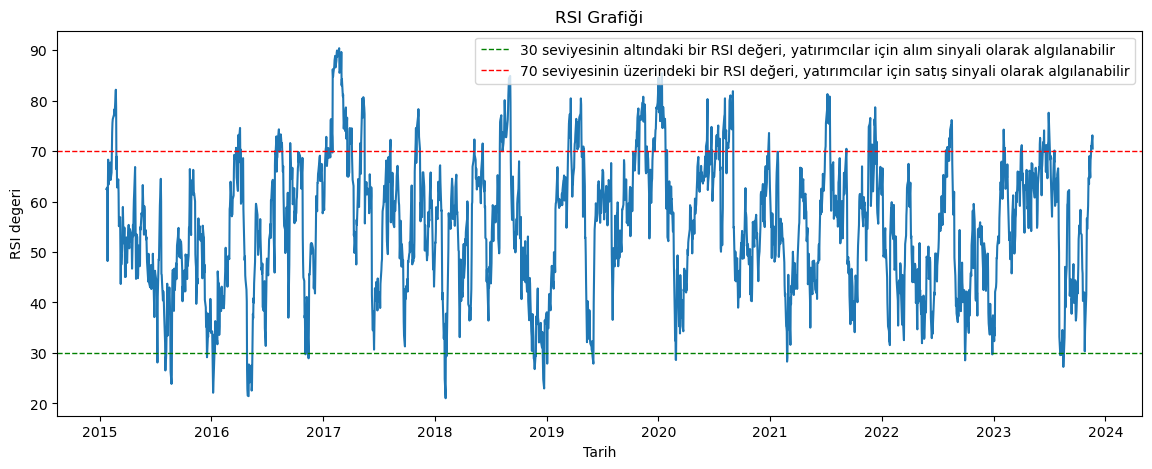

In [302]:
import pandas_ta as ta
periyot = 14
rsi = ta.rsi(veri_seti["Close"],periyot)
plt.figure(figsize=(14, 5))
plt.plot(veri_seti["Close"])
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()
ax.plot(rsi)
ax.axhline(30, linestyle='--', linewidth=1, color='green', label='30 seviyesinin altındaki bir RSI değeri, yatırımcılar için alım sinyali olarak algılanabilir')
ax.axhline(70, linestyle='--', linewidth=1, color='red', label='70 seviyesinin üzerindeki bir RSI değeri, yatırımcılar için satış sinyali olarak algılanabilir')
ax.set_xlabel('Tarih')
ax.set_ylabel('RSI degeri')
ax.set_title('RSI Grafiği')
ax.legend()

<h2><span style="color:green;">Düşüşün 1. Sebebi:</span> RSI Değerinin 70'ten Büyük Olması</h2>
<p>Modelin düşük bir fiyat  sergilemesinin nedenlerinden biri, belirlediğiniz tarih aralığında RSI (Relative Strength Index) değerinin 70 ten büyük olması olabilir. RSI, aşırı alım ve aşırı satım bölgelerini belirlemede yaygın olarak kullanılan bir teknik göstergedir.</p>


<p>RSI değeri 70 in üzerine çıktığında, hisse senedi aşırı alım bölgesine girmiş olabilir, bu da fiyatların aşırı yükseldiği ve kısa vadede düşüş olasılığının arttığı anlamına gelir.</p>

<p>Bu durumda, modelin düşük bir fiyat sonuçu vermesi, aşırı alım bölgesinde olan hisse senetlerinin fiyatlarının düşme eğiliminde olduğu bir döneme denk gelmesinden kaynaklanıyor olabilir. RSI değerinin 70 ten büyük olması, fiyatların daha fazla yükselme potansiyeli olmadığı ve hatta düşebileceği anlamına gelir. <strong>Bu nedenle modelin fiyatın düşüşe geçeçegi yönündeki Tahmini dogru olabilir</strong></p>

<h2>Modelin Fiyat Düşüşü Tahminini Bollinger Bantları ile Doğrulamak</h2>

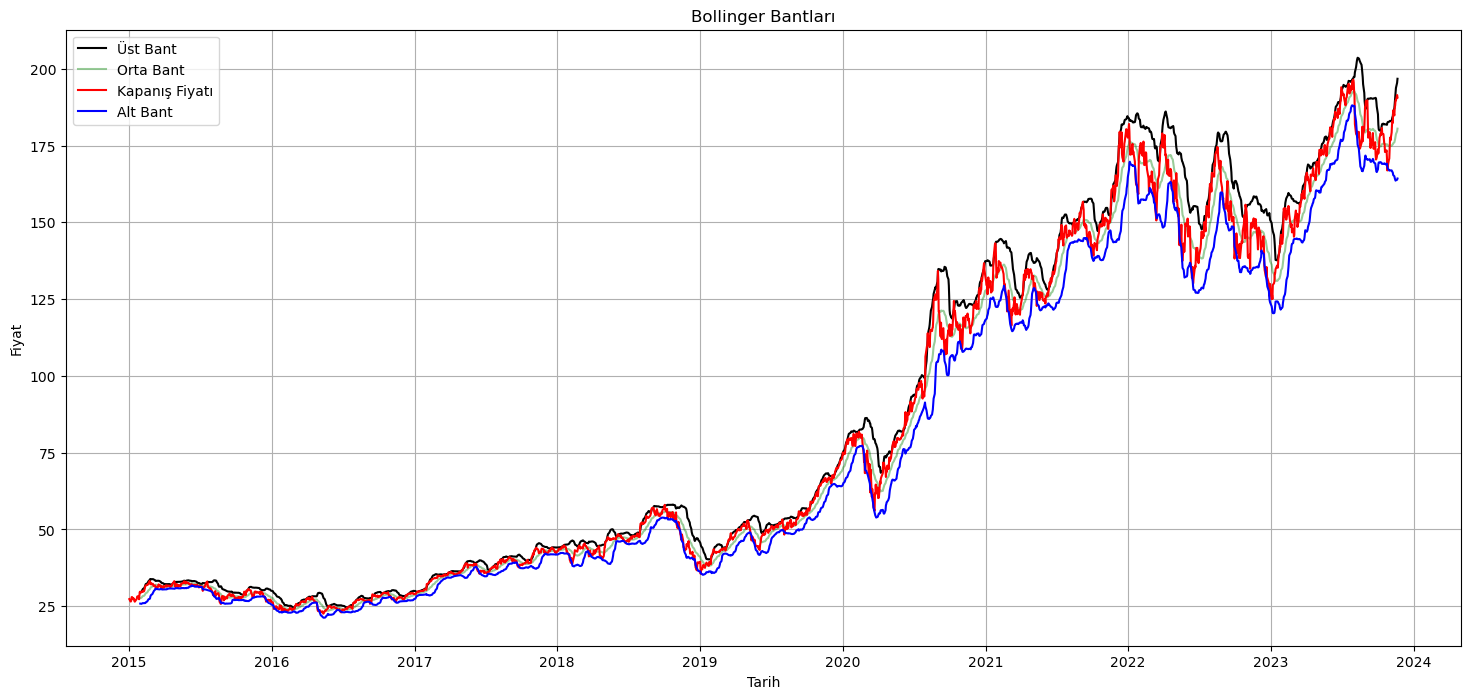

In [83]:
orta_bant_periot = 20
Orta_bant = veri_seti["Close"].rolling(window=orta_bant_periot).mean()
Üst_bant_periot = 20
ortalama = veri_seti["Close"].rolling(window=Üst_bant_periot).mean()
standart_sapma = veri_seti["Close"].rolling(window=Üst_bant_periot).std()
Üst_bant = ortalama + (standart_sapma * 2)
alt_bant = 20
ortalama = veri_seti["Close"].rolling(window=alt_bant).mean()
standart_sapma = veri_seti["Close"].rolling(window=alt_bant).std()
alt_bant = ortalama - (standart_sapma * 2)
plt.figure(figsize=(18,8))
plt.plot(Üst_bant, color='black', label='Üst Bant', alpha=1)
plt.plot(Orta_bant, color='green', label='Orta Bant', alpha=0.4)
plt.plot(veri_seti["Close"], color="red", label='Kapanış Fiyatı', alpha=1)
plt.plot(alt_bant, color='blue', label='Alt Bant', alpha=1)
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.title('Bollinger Bantları')
plt.legend()
plt.grid()


<h2><span style="color:green;">Düşüşün 2. Sebebi:</span> Bollinger Bantlarının Üst Sınırına Temas Etmesi</h2>

<p>Bollinger Bantları, hareketli ortalamaya dayalı bir teknik göstergedir ve fiyatın volatilitesini ölçmek için kullanılır. Üst bant, hareketli ortalamanın belirli bir standart sapma ile yukarıya doğru genişletilmiş bir sınırdır. Eğer fiyatlar bu üst banta dokunur veya bu sınırdan yukarıya çıkarsa, bu aşırı alım bölgesine girdiği anlamına gelir.</p>
<p>Aşırı alım bölgesine girme durumu, fiyatların aşırı değerlendiğini ve kısa vadeli bir düzeltme hareketine hazırlandığını gösterebilir. Bu durumda, yatırımcılar genellikle fiyatların düşmesi beklentisiyle pozisyonlarını kapatır veya satış yaparlar.</p>


<p>Dolayısıyla, Bollinger Bantlarının üst sınırına temas etmesi, fiyatların aşırı alım bölgesine girdiğini ve yakın zamanda bir düzeltme hareketi olabileceğini düşündürebilir. Bu nedenle, hisse senedinin fiyatında bir düşüş yaşanabileceği beklentisi oluşabilir <strong>Bu nedenle modelin fiyatın düşüşe geçeçegi yönündeki Tahmini dogru olabilir</strong>.</p>

<h2>Modelin Fiyat Düşüşü Tahminini Ichimoku Indikatörü ile Doğrulamak</h2>

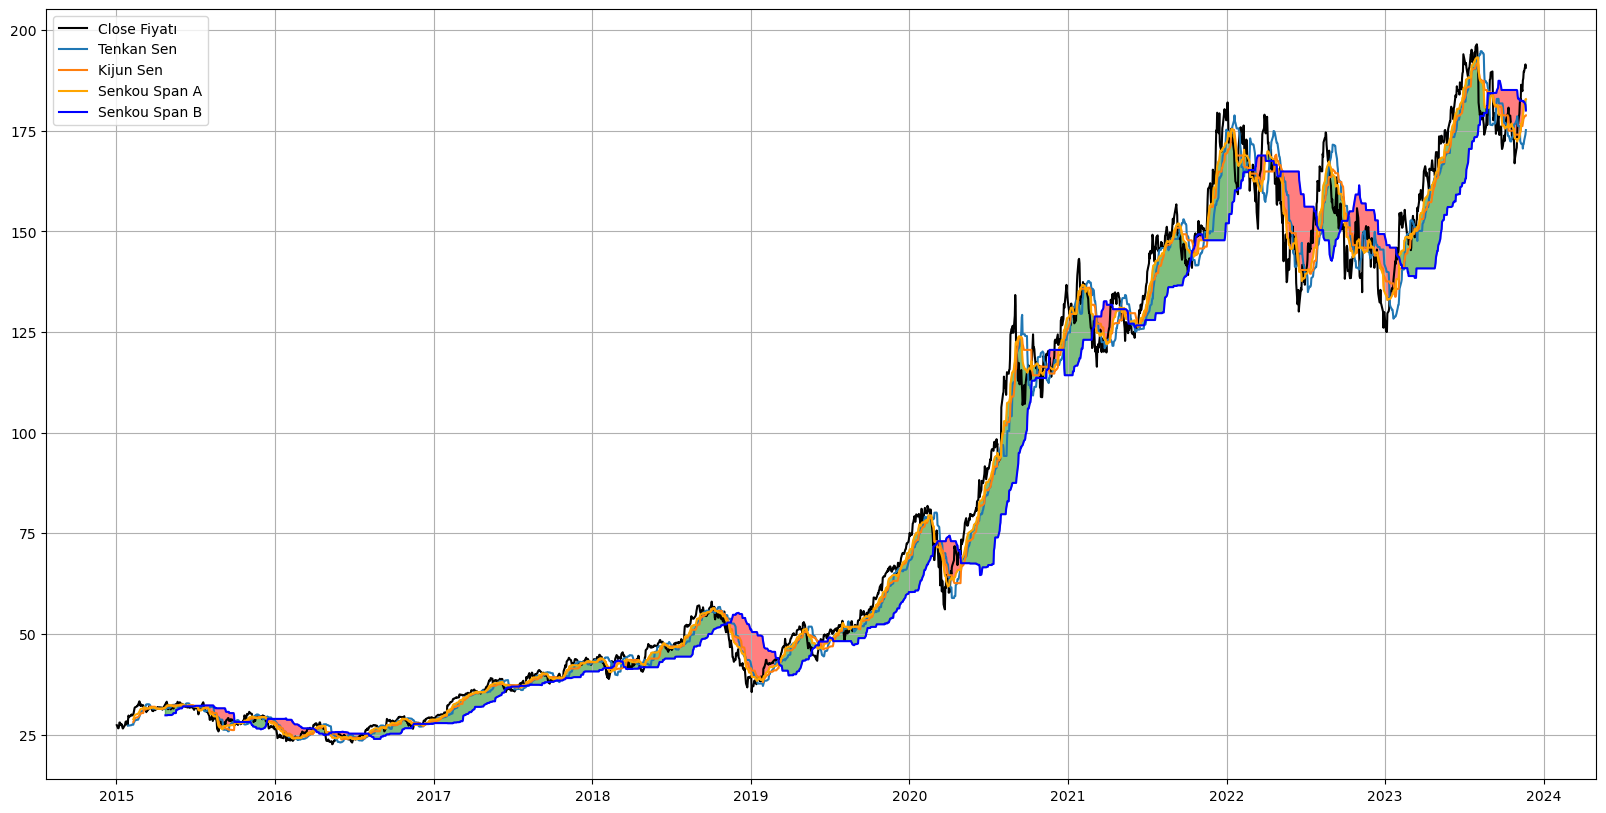

In [14]:
plt.figure(figsize=(20, 10))

periyot = 9
window_size = 26
# Ichimoku Indikatörü Formülü
#Tenkan-Sen = (En yüksek + En düşük) / 2, geçmiş 9 periyod
#Kijun Sen = (En yüksek + En düşük) / 2, geçmiş 26 periyod

en_yüksek = veri_seti["High"].rolling(window=periyot).max()
#veri setinin 9 günlük en yüksek degerlerinin en büyük degerini alıyorum burda 
en_düşük = veri_seti["Low"].rolling(window=periyot).min()
#veri setinin 9 günlük en küçük degerlerinin bu periyotteki en küçük degerini alıyorum burda 

kiju_en_yüksek = veri_seti["High"].rolling(window=window_size).max()
kiju_endüşük = veri_seti["Low"].rolling(window=window_size).min()

kijusen = (kiju_en_yüksek + kiju_endüşük) / 2
tekasen = (en_yüksek + en_düşük) / 2

plt.plot(veri_seti["Close"], color="black", label="Close Fiyatı")
plt.plot(tekasen.shift(periyot), label="Tenkan Sen")
plt.plot(kijusen, label="Kijun Sen")
#Senkou Span A (Başlangıç Bulutu)
# (Tenkan Sen + Kijun Sen) / 2, 26 periyot öne kaydırılmış halidir
# pd.Series(((tekasen + kijusen) / 2) bu iki degeri pandas ile toplayıp 2 ye böldüm
senkou_span_a = pd.Series(((tekasen + kijusen) / 2), name="Senkou Span A")

#(Son 52 Periyodun En Yükseği + Son 52 Periyodun En Düşüğü) / 2, 26 periyot öne kaydırılmış
senkou_span_b = pd.Series(((veri_seti["High"].rolling(window=52).max() + veri_seti["Low"].rolling(window=52).min()) / 2).shift(26), name="Senkou Span B")
plt.plot(senkou_span_a, label="Senkou Span A", color="orange")
plt.plot(senkou_span_b, label="Senkou Span B", color="blue")
plt.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, where=(senkou_span_a >= senkou_span_b), color="green", alpha=0.5)
plt.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, where=(senkou_span_a < senkou_span_b), color="red", alpha=0.5)

plt.grid()
plt.legend()



<h2><span style="color:green;">Düşüşün 3. Sebebi:</span> Ichimoku Bulutu Göstergesi Düşüş sinyali vermesi</h2>

<p>belirlenen tarihler arasında senkou_span_a dan  senkou_span_b küçük olması (red)  yani düşüş sinayli vermiştir </p>
<p><strong>Bu durumda modelin fiyatın düşüşe geçeceği yönündeki tahmini doğru olabilir.</strong></p>


<h3>Bu indikatörlerden aldığımız sonuçlara bakarak, aslında LSTM modelinin fiyat düşüşü konusundaki davranışının pek de anlamsız olmadığı konusunda bize fikir vermeye yardımcı oldular.</h3>

<h2>Gerçek Değerlerle Model Tahminlerinin Karşılaştırılması</h2>

<h3 style="color:red"> 2023-11-22 tarihine kadar olan kısıma modelin tahmin ettiği 110 günü daha ekledim yani artık 2024-03-11 tarihine kadar elimizde veri seti var</h3>

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Kapanış Fiyatı')

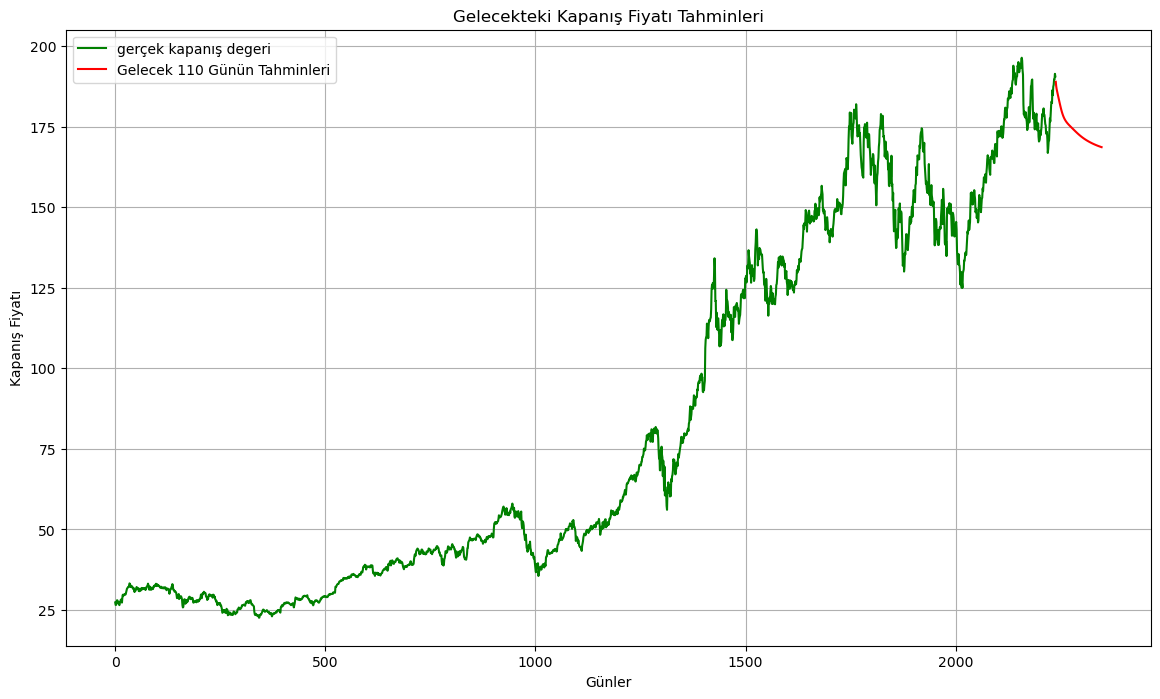

In [313]:
last_90_days = kapanis_verileri_sc[-90:].reshape(1, 90, 1)
veri_seti = yf.download("AAPL",start="2015-01-01",end="2023-11-22")
future_predictions_scaled = []


for _ in range(110):
    next_day_price = model.predict(last_90_days)
    future_predictions_scaled.append(next_day_price[0, 0])
    next_day_price_reshaped = np.array([[next_day_price[0, 0]]]).reshape(1, 1, 1)
    last_90_days = np.append(last_90_days[:, 1:, :], next_day_price_reshaped, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(range(len(veri_seti["Close"])),veri_seti["Close"],label="gerçek kapanış degeri",color="green")
plt.plot(range(len(kapanis_verileri), len(kapanis_verileri) + 110), future_predictions,color="red", label="Gelecek 110 Günün Tahminleri")
plt.legend()
plt.grid()
plt.title("Gelecekteki Kapanış Fiyatı Tahminleri")
plt.xlabel("Günler")
plt.ylabel("Kapanış Fiyatı")

<h2>elimizdeki veri ve modelin 110 günlük tahmini elimzide 2024-03-10  tarihine kadar veri var</h2>

<h1>Biz artık yf kullanarak 2024-03-10 tarihine kadar verileri alacagız bu şekilde modelin gelecek degerlerle uyumunu görecegiz </h1>

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Kapanış Fiyatı')

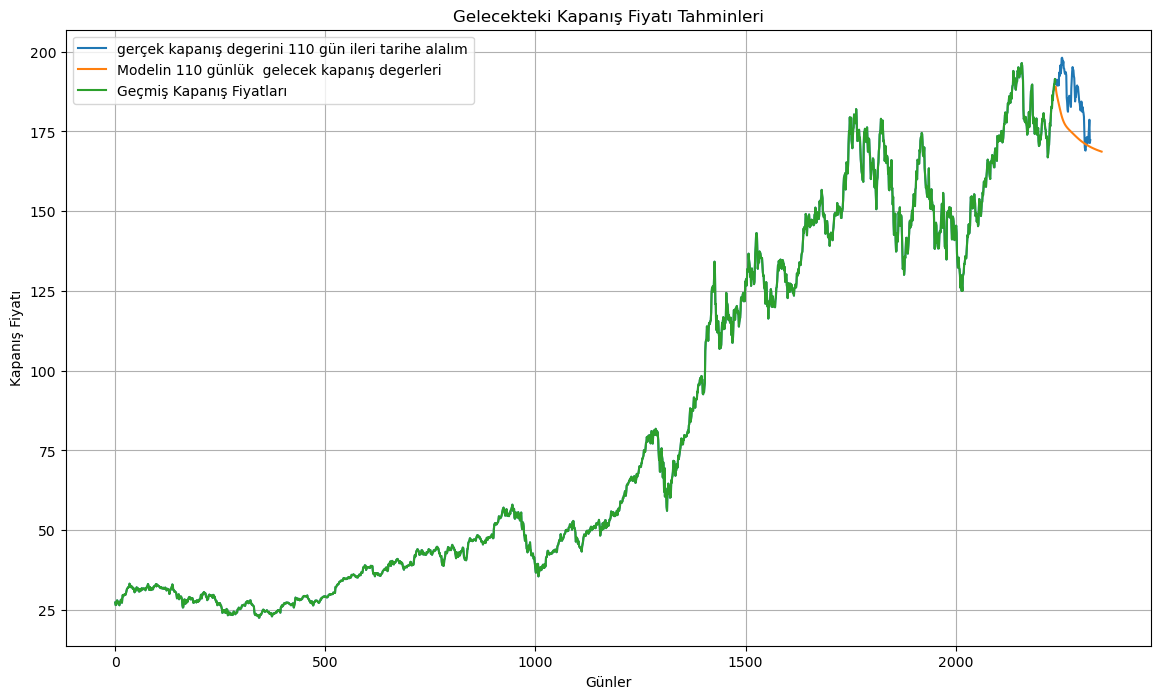

In [325]:

last_90_days = kapanis_verileri_sc[-90:].reshape(1, 90, 1)
veri_seti = yf.download("AAPL",start="2015-01-01",end="2024-03-10")
future_predictions_scaled = []


for _ in range(110):
    next_day_price = model.predict(last_90_days)
    future_predictions_scaled.append(next_day_price[0, 0])
    next_day_price_reshaped = np.array([[next_day_price[0, 0]]]).reshape(1, 1, 1)
    last_90_days = np.append(last_90_days[:, 1:, :], next_day_price_reshaped, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(range(len(veri_seti["Close"])),veri_seti["Close"],label="gerçek kapanış degerini 110 gün ileri tarihe alalım")
plt.plot(range(len(kapanis_verileri), len(kapanis_verileri) + 110), future_predictions, label="Modelin 110 günlük  gelecek kapanış degerleri")
plt.plot(range(len(kapanis_verileri)), kapanis_verileri, label="Geçmiş Kapanış Fiyatları")
plt.legend()
plt.grid()
plt.title("Gelecekteki Kapanış Fiyatı Tahminleri")
plt.xlabel("Günler")
plt.ylabel("Kapanış Fiyatı")

In [328]:
print("Modelin son gün için tahmini : ",future_predictions[-1])

array([168.68407], dtype=float32)

In [21]:
veri_seti = yf.download("AAPL",start="2015-01-01",end="2024-03-10")

[*********************100%%**********************]  1 of 1 completed


In [22]:
veri_seti.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600


<h1>Elimizdeki Son Kapanış Fiyatı: 170.72</h1>
<h1>Modelin Son Gün İçin Tahmini: 168.68</h1>